In [1]:
from data.SyntheticDataset import gaussianGridDataset, ringDataset, circleDataset
from Online_Kernel_GAN import Online_Kernel_GAN

# Let's make a 2d synthetic dataset
## (1) Gaussian 2d grid dataset

In [2]:
data_config = {
            'num_grid':5,
            'n_data':100,
            'sigma':0.05
        }
data_gaussiangrid = gaussianGridDataset(n=data_config['num_grid'], n_data=data_config['n_data'], sig=data_config['sigma'])

# Let's create and train the GAN on this dataset

A gamma value starts from 0.2 and increases with a ratio of 1.002 after every epoch. We can observe that the GAN with the online kernel classifier learns a gaussian 2d grid distribution. All images are saved in 'out_image/out_gaussian2d_online_kernel'.

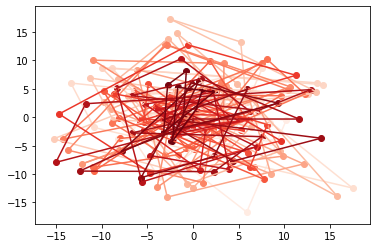

spent time for epoch 19 is 3.2692172527313232s
epoch # : 19 gamma : 0.20773836287796785 gen loss : 0.8403537273406982


In [5]:
# gan_gaussian2d = Online_Kernel_GAN(gamma=0.2, gamma_ratio=1.0015, lr_gamma=0.999, budget=4096, num_epochs=3000, batch_size=500, data=data_gaussiangrid)
# gan_gaussian2d.train_GAN()

%pylab inline
fig, ax = plt.subplots(figsize=(8, 8))
gan_gaussian2d = Online_Kernel_GAN(gamma=0.2, gamma_ratio=1.002, budget=4096, num_epochs=20, batch_size=50, data=data_gaussiangrid)
gan_gaussian2d.train_GAN(plotter=plt)


## (2) Ring 2d dataset

In [ ]:
data_config = {
            'num_mode':8,
            'n_data':300,
            'sigma':0.05,
            'radius':4
        }
data_ring = ringDataset(n=data_config['num_mode'], n_data=data_config['n_data'], sig=data_config['sigma'], r=data_config['radius'])

All images are saved in 'out_image/out_gaussian2d_online_kernel'.

In [ ]:
gan_ring2d = Online_Kernel_GAN(gamma=0.2, gamma_ratio=1.0015, lr_gamma=0.999, budget=4096, num_epochs=3000, batch_size=500, data=data_ring)
gan_ring2d.train_GAN()

## (3) Circle 2d dataset

In [ ]:
data_config = {
            'n_data':30,
            'sigma':0.05,
            'radius':2
        }
data_circle = circleDataset(n_data=data_config['n_data'], sig=data_config['sigma'], r=data_config['radius'])

All images are saved in 'out_image/out_gaussian2d_online_kernel'.

In [ ]:
gan_circle2d = Online_Kernel_GAN(gamma=0.2, gamma_ratio=1.0015, lr_gamma=0.999, budget=4096, num_epochs=3000, batch_size=500, data=data_circle)
gan_circle2d.train_GAN()

# Now let's play with the MNIST dataset

In [ ]:
import torch
from torchvision import transforms, datasets

img_size = 64

def mnist_data():
    compose = transforms.Compose(
        [transforms.Resize(img_size),
         transforms.ToTensor(),
         transforms.Normalize((.5,), (.5,))
        ])
    out_dir = 'data'
    return datasets.MNIST(root=out_dir, train=True, transform=compose, download=True)

data_mnist = mnist_data()

# Performance on MNIST

In this experiment, we use a polynomial kernel and fix the gamma value as 1/784. All images are saved in 'out_image/out_mnist_online_kernel'. There is an error when we try to change the model into "DCGAN". If a budget constraint of the online kernel classifier is large, the online kernel classifier shows high accuracy on a binary classification task of MNIST.

In [ ]:
gan_mnist = Online_Kernel_GAN(kernel='gaussian', lr=0.0002, gamma=0.01, gamma_ratio=1.0, budget=700, g_steps=10, num_epochs=200, batch_size=200, img_size=img_size, data=data_mnist, data_type='mnist', model_type='DCGAN')
gan_mnist.train_GAN()

# Now let's play with the SVHN dataset

In [ ]:
import torch
from torchvision import datasets
from torchvision import transforms

# Tensor transform
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((.5, .5, .5), (.5, .5, .5))
    ])

# SVHN training datasets
data_svhn = datasets.SVHN(root='data/', split='train', download=True, transform=transform)
print(len(data_svhn))

img_size = 32
batch_size = 128

# Performance on SVHN

In this experiment, we use a polynomial kernel and fix the gamma value as 0.01. All images are saved in 'out_image/out_svhn_online_kernel'. I implemented the encoder in the online kernel classifier in order to calculate kernel with image data. I observed that GAN works better when a size of budget is smaller than one for a binary classification task of MNIST.

In [ ]:
gan_svhn = Online_Kernel_GAN(kernel='poly', lr=0.0002, gamma=0.01, gamma_ratio=1.0, budget=2000, g_steps=1, num_epochs=200, batch_size=batch_size, img_size=img_size, data=data_svhn, data_type='svhn', model_type='DCGAN')
gan_svhn.train_GAN()

# Let's play with the CelebA dataset

In [ ]:
import torch
import torchvision.utils as vutils
from torchvision import datasets
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 64
batch_size = 128
dataroot = "data/celeba"

data_celeba = datasets.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(img_size),
                               transforms.CenterCrop(img_size),
                               transforms.ToTensor(),
                               transforms.Normalize((.5, .5, .5), (.5, .5, .5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(data_celeba, batch_size=batch_size,
                                         shuffle=True)

# Decide which device we want to run on
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

# Performance on CelebA
In this experiment, we use a mixed gaussian kernel. You can try another kernels in 'online_kernel_classifier.py'. We found out that mixed gaussian kernel works best. All images are saved in 'out_image/out_celeba_online_kernel'. I implemented the encoder in the online kernel classifier in order to calculate kernel with image data.

In [ ]:
gan_celeba = Online_Kernel_GAN(kernel='mixed_gaussian', lr=0.0002, gamma=torch.tensor([1/(2*2**2), 1/(2*5**2), 1/(2*10**2), 1/(2*20**2), 1/(2*40**2), 1/(2*80**2)]), gamma_ratio=1.0, alpha=0.5, budget=1000, g_steps=3, num_epochs=7, batch_size=batch_size, img_size=img_size, data=data_celeba, data_type='celeba', model_type='DCGAN')
gan_celeba.train_GAN()